<a href="https://colab.research.google.com/github/kashir123/GBPUSD-final-project/blob/main/GBPUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# libraries

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pip install -U kaleido plotly

In [3]:
os.chdir('/content/drive/MyDrive/project')

In [4]:
data = pd.read_csv("gbp_usd_data.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,0
1,2004-10-04,1.797591,1.797785,1.782086,1.784312,1.784312,0
2,2004-10-05,1.784312,1.787694,1.780912,1.782912,1.782912,0
3,2004-10-06,1.782785,1.788493,1.775095,1.779486,1.779486,0
4,2004-10-07,1.779486,1.784312,1.777493,1.782499,1.782499,0


In [5]:
data = data.drop(columns=['Volume','Adj Close'])

In [6]:
data.head()

,Date,Open,High,Low,Close
0,2004-10-01,1.812908,1.813598,1.793400,1.799111
1,2004-10-04,1.797591,1.797785,1.782086,1.784312
2,2004-10-05,1.784312,1.787694,1.780912,1.782912
3,2004-10-06,1.782785,1.788493,1.775095,1.779486
4,2004-10-07,1.779486,1.784312,1.777493,1.782499


In [ ]:
data.describe()

,Open,High,Low,Close
count,5200.000000,5200.000000,5200.000000,5200.000000
mean,1.518296,1.523915,1.512300,1.518320
std,0.237287,0.237954,0.237076,0.237310
min,1.072846,1.083541,0.637389,1.072754
25%,1.303586,1.307950,1.299195,1.303607
50%,1.517888,1.523926,1.511259,1.517957
75%,1.643554,1.648404,1.636909,1.643372
max,2.108415,2.115820,2.098812,2.108192


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
data.shape

(5200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5200 non-null   object 
 1   Open    5200 non-null   float64
 2   High    5200 non-null   float64
 3   Low     5200 non-null   float64
 4   Close   5200 non-null   float64
dtypes: float64(4), object(1)
memory usage: 203.2+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5200 non-null   datetime64[ns]
 1   Open    5200 non-null   float64       
 2   High    5200 non-null   float64       
 3   Low     5200 non-null   float64       
 4   Close   5200 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 203.2 KB


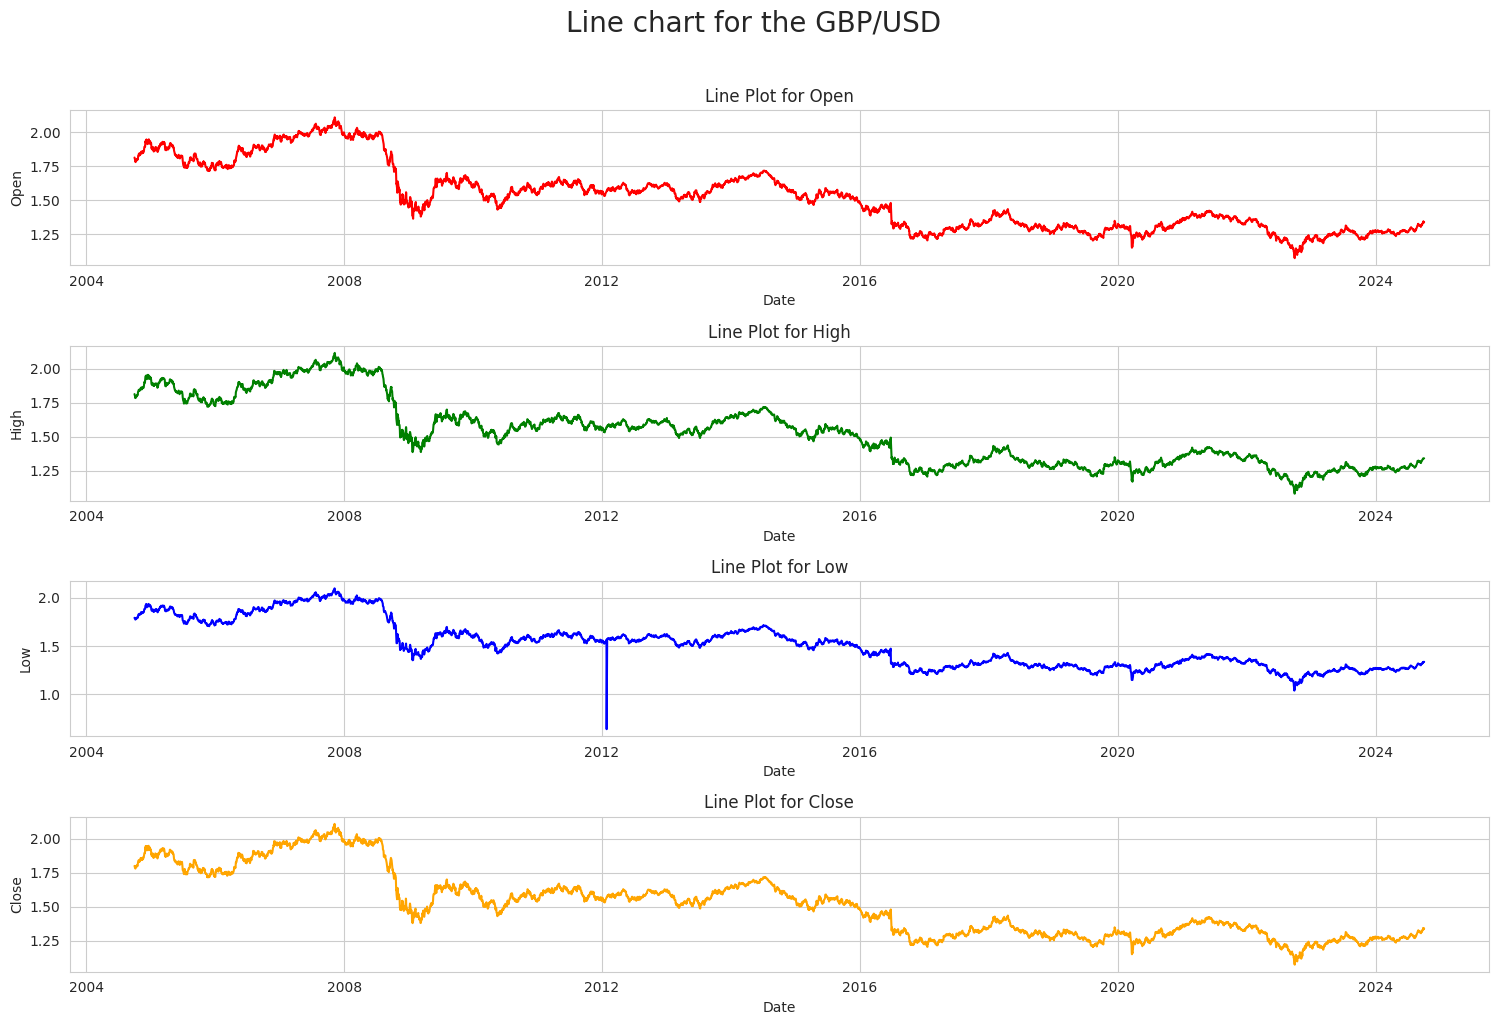

In [16]:
fig, axs = plt.subplots(4,1, figsize=(15,10))

col = ['Open', 'High', 'Low', 'Close']
colors = ['red','green','blue','orange']

for i,name in enumerate(col):
  sns.lineplot(data=data, x='Date', y=name, color=colors[i], ax=axs[i])
  axs[i].set_xlabel('Date')
  axs[i].set_ylabel(name)
  axs[i].set_title(f'Line Plot for {name}')
  sns.set_style('whitegrid')

plt.suptitle('Line chart for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [26]:
pip show kaleido

Name: kaleido
Version: 0.4.1
Summary: Plotly graph export library
Home-page: 
Author: 
Author-email: Andrew Pikul <ajpikul@gmail.com>
License: The MIT License (MIT)
        
        Copyright (c) Plotly, Inc
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in
        all copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTI

In [22]:
pip install -U kaleido

In [27]:
fig = go.Figure(data=[go.Candlestick(x=data.Date,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='Candlestick chart for the GBP/USD',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

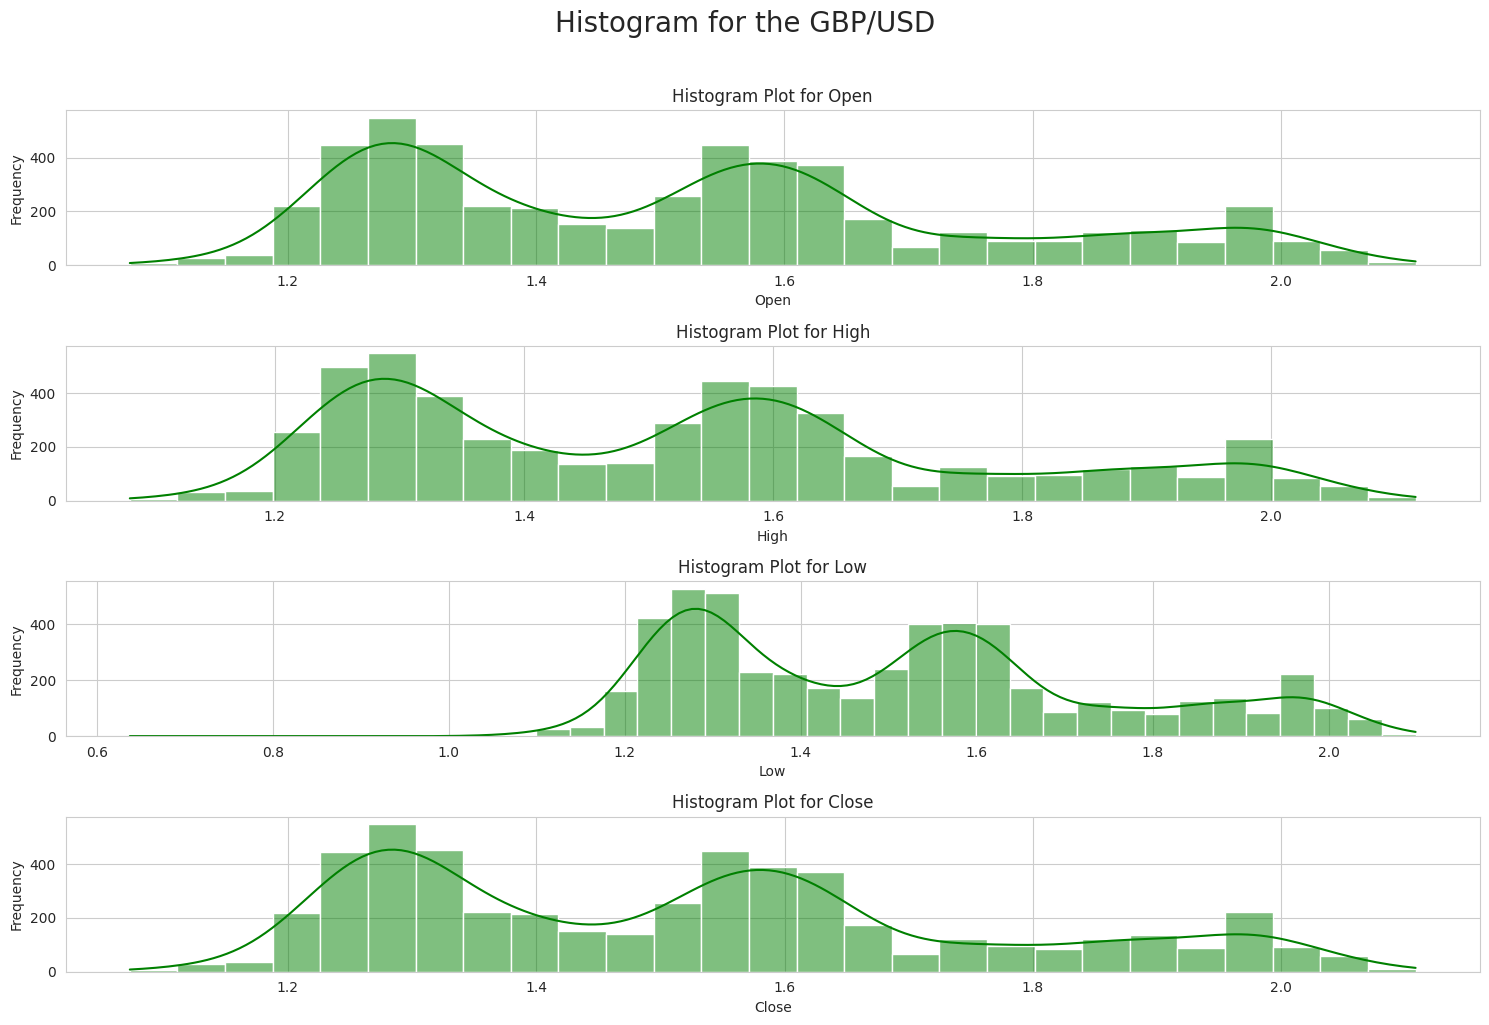

In [28]:
fig, axs = plt.subplots(4,1, figsize=(15,10))


for i,name in enumerate(col):
  sns.histplot(data=data[name],kde=True, color="green", ax=axs[i])
  axs[i].set_xlabel(name)
  axs[i].set_ylabel("Frequency")
  axs[i].set_title(f'Histogram Plot for {name}')

plt.suptitle('Histogram for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

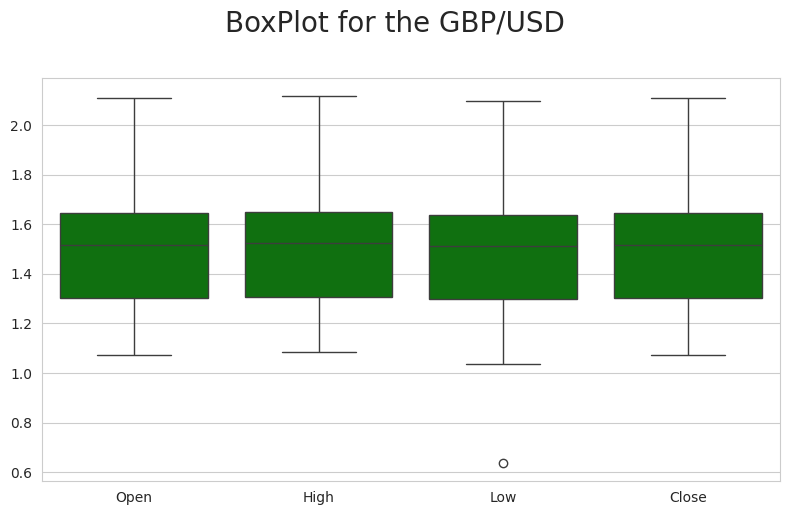

In [29]:
plt.figure(figsize=(8,5))


sns.boxplot(data=data, color="green")

plt.suptitle('BoxPlot for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [30]:
def remove_outliers(dataset,columns):
  '''
  Remove the outliers from the dataset

  Parameters:
  dataset: contains the forex data
  columns: contains the columns of the dataset
  '''

  for column in columns:
    #calculate the 25%(Q1) and 75% (q3)
    first_quantile = dataset[column].quantile(0.25)
    third_quantile = dataset[column].quantile(0.75)

    inter_qunatile = third_quantile - first_quantile # interquantile range

    #define the bounds
    lower_bound = first_quantile - 1.5*inter_qunatile
    upper_bound = third_quantile + 1.5*inter_qunatile

    #remove the outliers
    dataset = dataset[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]

  return dataset


In [31]:
data_cleaned = remove_outliers(data,col)

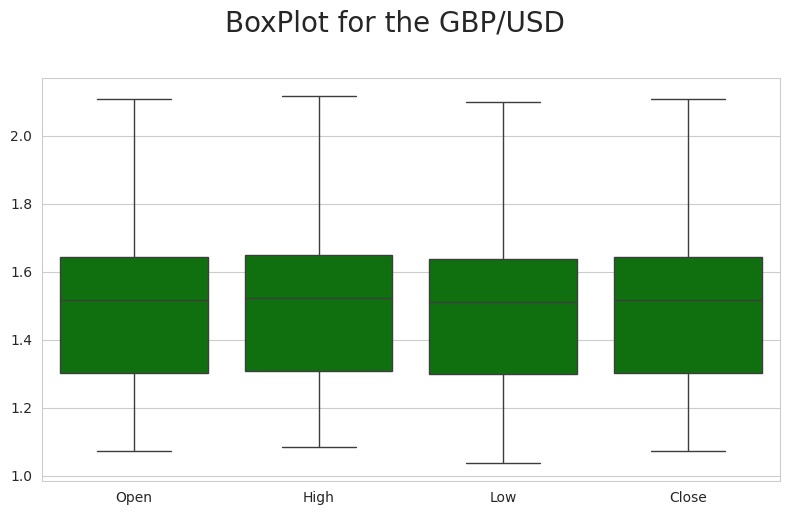

In [32]:
#plot the box plot again to check outliers removed
plt.figure(figsize=(8,5))

#plot the boxplot
sns.boxplot(data=data_cleaned, color="green")


plt.suptitle('BoxPlot for the GBP/USD', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# **Techinal Indicators**

In [33]:
def calculate_ema(data, period):
  '''
  Calculate the exponential moving average for the data

  parameter:
  data: contains the GBP/USD data
  period: contains the period of the moving average

  return: panda series
  '''
  return data.ewm(span=period, adjust=False).mean()

data_cleaned['EMA5'] = calculate_ema(data_cleaned['Close'], 5)
data_cleaned['EMA10'] = calculate_ema(data_cleaned['Close'], 10)
data_cleaned['EMA20'] = calculate_ema(data_cleaned['Close'], 20)


In [34]:
def calculate_sma(data, period):
  '''
  Calculate the simple moving average for the data

  parameter:
  data: contains the forex data
  period: contains the period of the moving average

  return: panda series
  '''
  return data.rolling(window=period).mean()

data_cleaned['SMA5'] = calculate_sma(data_cleaned['Close'], 5)
data_cleaned['SMA10'] = calculate_sma(data_cleaned['Close'], 10)
data_cleaned['SMA20'] = calculate_sma(data_cleaned['Close'], 20)


In [35]:
def calculate_rsi(data, period):
  '''
  Calculate the relative strength index for the data

  parameter:
  data: contains the forex data
  period: contains the period of the moving average

  return: panda series
  '''
  # difference in the prices
  diff_delta = data['Close'].diff(1)

  #gain
  gain = diff_delta.where(diff_delta > 0, 0)

  #loss
  loss = -diff_delta.where(diff_delta < 0, 0)

  # rolling average for the loss and gain
  average_gain = gain.rolling(window=period, min_periods=1).mean()
  average_loss = loss.rolling(window=period, min_periods=1).mean()

  # relative strength
  relative_strength = average_gain / average_loss

  # calculate RSI
  rsi = 100 - (100 / (1 + relative_strength))

  return rsi

data_cleaned['RSI12'] = calculate_rsi(data_cleaned, 12)
data_cleaned['RSI24'] = calculate_rsi(data_cleaned, 24)

In [36]:
def calculate_macd(data):
  '''
  Calculate the moving average convergence divergence (MACD), signal
  line and MACD histogram for the data

  parameter:
  data: contains the forex data

  return: multiple series (MACD, Macd histogram, signal line)
  '''
  # calculate the 12 and 26 ema
  ema12 = data['Close'].ewm(span=12, adjust=False).mean()
  ema26 = data['Close'].ewm(span=26, adjust=False).mean()
  # calculate the MACD
  macd = ema12 - ema26

  # calculate the signal line
  signal_line = macd.ewm(span=9, adjust=False).mean()

  # calculate the MACD histogram
  macd_histogram = macd - signal_line

  return macd, macd_histogram, signal_line

data_cleaned['MACD'], data_cleaned['MACD_Histogram'], data_cleaned['Signal_line'] = calculate_macd(data_cleaned)


In [37]:
def calculate_bollinger(data, sma20):
  '''
  Calculate the bollinger bands for the data

  parameter:
  data: contains the forex data
  sma20: contains the simple moving average of 20 days

  return: multiple series (bollinger bands)
  '''
  std = sma20.rolling(window=20).std()
  upper_band = sma20 + (std * 2)
  lower_band = sma20 - (std * 2)

  return upper_band, lower_band

data_cleaned['BB_Upper_band'], data_cleaned['BB_Lower_band'] = calculate_bollinger(data_cleaned, data_cleaned['SMA20'])

In [38]:
data_cleaned.tail(20)

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
5180,2024-09-03,1.314112,1.314752,1.309003,1.314199,1.315303,1.311997,1.304072,1.317758,1.315189,1.298228,74.261062,63.310897,0.009564,0.001343,0.008221,1.308052,1.288403
5181,2024-09-04,1.311355,1.317488,1.310238,1.311407,1.314004,1.311890,1.304770,1.314889,1.315976,1.300374,65.970985,61.271266,0.008951,0.000584,0.008367,1.311822,1.288927
5182,2024-09-05,1.314475,1.318809,1.313888,1.314475,1.314161,1.312360,1.305695,1.313911,1.316488,1.302696,65.134186,69.539068,0.008613,0.000197,0.008416,1.315909,1.289484
5183,2024-09-06,1.317731,1.323434,1.312991,1.317749,1.315357,1.313340,1.306843,1.314136,1.317286,1.304846,64.272061,68.770453,0.008512,0.000077,0.008435,1.319839,1.289854
5184,2024-09-09,1.313232,1.314389,1.307155,1.313336,1.314683,1.313339,1.307461,1.314233,1.316493,1.306761,54.123236,65.939506,0.007983,-0.000362,0.008345,1.323423,1.290099
5185,2024-09-10,1.306984,1.310753,1.304989,1.307138,1.312168,1.312211,1.307430,1.312821,1.315289,1.308262,47.565349,68.605406,0.006984,-0.001089,0.008073,1.326358,1.290166
5186,2024-09-11,1.308216,1.311166,1.300323,1.308027,1.310788,1.311451,1.307487,1.312145,1.313517,1.309330,34.798975,69.158440,0.006192,-0.001505,0.007697,1.328563,1.290097
5187,2024-09-12,1.303917,1.308387,1.303271,1.303951,1.308509,1.310087,1.307150,1.310040,1.311976,1.310384,33.282015,64.353694,0.005176,-0.002016,0.007193,1.330405,1.290363
5188,2024-09-13,1.313318,1.315686,1.311648,1.313232,1.310083,1.310659,1.307730,1.309137,1.311637,1.311748,37.023874,67.247485,0.005061,-0.001705,0.006766,1.332281,1.291215
5189,2024-09-16,1.313594,1.321388,1.313594,1.313800,1.311322,1.311230,1.308308,1.309230,1.311731,1.312702,43.439172,66.792602,0.004959,-0.001446,0.006405,1.333447,1.291958


In [39]:
data_cleaned.describe()

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
count,5199,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5199.000000,5195.000000,5190.000000,5180.000000,5198.000000,5198.000000,5199.000000,5199.000000,5199.000000,5161.000000,5161.000000
mean,2014-10-06 18:42:18.488170752,1.518287,1.523905,1.512468,1.518310,1.518488,1.518715,1.519179,1.518275,1.518234,1.518152,49.917907,49.824419,-0.000655,0.000006,-0.000661,1.533116,1.500887
min,2004-10-01 00:00:00,1.072846,1.083541,1.037904,1.072754,1.089887,1.106927,1.120575,1.086064,1.106786,1.113240,0.000000,0.000000,-0.059307,-0.015220,-0.055333,1.134304,1.085289
25%,2009-10-12 12:00:00,1.303560,1.307925,1.299258,1.303603,1.303792,1.303959,1.303161,1.303638,1.303996,1.302686,37.325419,41.056135,-0.005846,-0.001747,-0.005593,1.312924,1.291091
50%,2014-10-09 00:00:00,1.517865,1.523926,1.511259,1.517911,1.518145,1.519161,1.523193,1.517616,1.517211,1.519903,50.064914,50.006096,0.000118,-0.000007,0.000146,1.537397,1.497829
75%,2019-10-07 12:00:00,1.643561,1.648465,1.636916,1.643385,1.642330,1.641498,1.641373,1.642639,1.642637,1.640198,62.926876,59.363568,0.005616,0.001857,0.005265,1.653667,1.624830
max,2024-09-30 00:00:00,2.108415,2.115820,2.098812,2.108192,2.094209,2.084708,2.070346,2.094231,2.084354,2.072104,100.000000,91.559433,0.038755,0.015213,0.033321,2.091853,2.058757
std,NaN,0.237309,0.237976,0.236788,0.237332,0.237167,0.237001,0.236669,0.237202,0.237064,0.236777,18.284582,12.915935,0.009980,0.002951,0.009416,0.238405,0.235199


In [40]:
# take some data point point to get more clear view of indicators

data_cleaned_indicators = data_cleaned[(data_cleaned['Date'] > '2016-01-01') & (data_cleaned['Date'] < '2017-01-01')]


In [41]:
#plot SMA's with the closing price

fig = go.Figure()

#add the closing price
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Close'], marker_color='red', name='Close', showlegend=True))
#add the SMA5
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['SMA5'], marker_color='green', name='SMA5', showlegend=True))
#add the SMA10
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['SMA10'], marker_color='blue', name='SMA10', showlegend=True))
#add the SMA20
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['SMA20'], marker_color='orange', name='SMA20', showlegend=True))

fig.update_layout(title='Closing Price with Simple Moving Average (SMA)', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

In [42]:
#plot the EMA's with the closing price
fig = go.Figure()

#add the closing price
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Close'], marker_color='red', name='Close', showlegend=True))
#add EMA5
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['EMA5'], marker_color='green', name='EMA5', showlegend=True))
#add EMA10
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['EMA10'], marker_color='blue', name='EMA10', showlegend=True))
#add EMA20
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['EMA20'], marker_color='orange', name='EMA20', showlegend=True))

fig.update_layout(title='Closing Price with Exponential Moving Average (EMA)', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

In [43]:
# plot for RSI24

fig = go.Figure()

#add the RSI24 line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['RSI12'], marker_color='blue', name='RSI12', showlegend=True))

#add the hirizontal line for the overbought position
fig.add_hline(y=70, line_color='red', line_dash='dash', annotation_text='Overbought')

#add the hirizontal line for the oversold position
fig.add_hline(y=30, line_color='green', line_dash='dash', annotation_text='Oversold')

fig.update_layout(title='Relative Strength Index (RSI)', xaxis_title='Date', yaxis_title='RSI')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

In [44]:
# plot for RSI24

fig = go.Figure()

#add the RSI24 line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['RSI24'], marker_color='blue', name='RSI24', showlegend=True))

#add the hirizontal line for the overbought position
fig.add_hline(y=70, line_color='red', line_dash='dash', annotation_text='Overbought')

#add the hirizontal line for the oversold position
fig.add_hline(y=30, line_color='green', line_dash='dash', annotation_text='Oversold')

fig.update_layout(title='Relative Strength Index (RSI)', xaxis_title='Date', yaxis_title='RSI')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

In [45]:
#plot the MACD with plotly to visualise better way

fig = go.Figure()

#add the MACD line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['MACD'], marker_color='blue', name='MACD'))

#add the signal line on the chart
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Signal_line'], marker_color='orange', name='Signal Line'))

#add the histogram on the chart
fig.add_trace(go.Bar(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['MACD_Histogram'], name='MACD Histogram',
                     marker_color=['green' if val>0 else 'red' for val in data_cleaned_indicators['MACD_Histogram']]))


fig.update_layout(title='Moving Average Convergence Divergence (MACD)', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

In [46]:
#plot the Closing price Bollinger band

fig = go.Figure()

#add the closing price
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['Close'], marker_color='orange', name='Close', showlegend=True))

#add the upper band
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['BB_Upper_band'], marker_color='red', name='Upper band', showlegend=True))

#add the lower band
fig.add_trace(go.Scatter(x=data_cleaned_indicators['Date'], y=data_cleaned_indicators['BB_Lower_band'], marker_color='green', name='Lower band', showlegend=True))

#update the layout
fig.update_layout(title='Closing Price with Bollinger Bands', xaxis_title='Date', yaxis_title='Price')

fig.update_layout(width=1200,height=400)
#show the graph
fig.show("svg")

TypeError: argument of type 'NoneType' is not iterable

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e0a7f0524d0> (for post_execute):


KeyboardInterrupt: 

<Figure size 1500x1000 with 0 Axes>

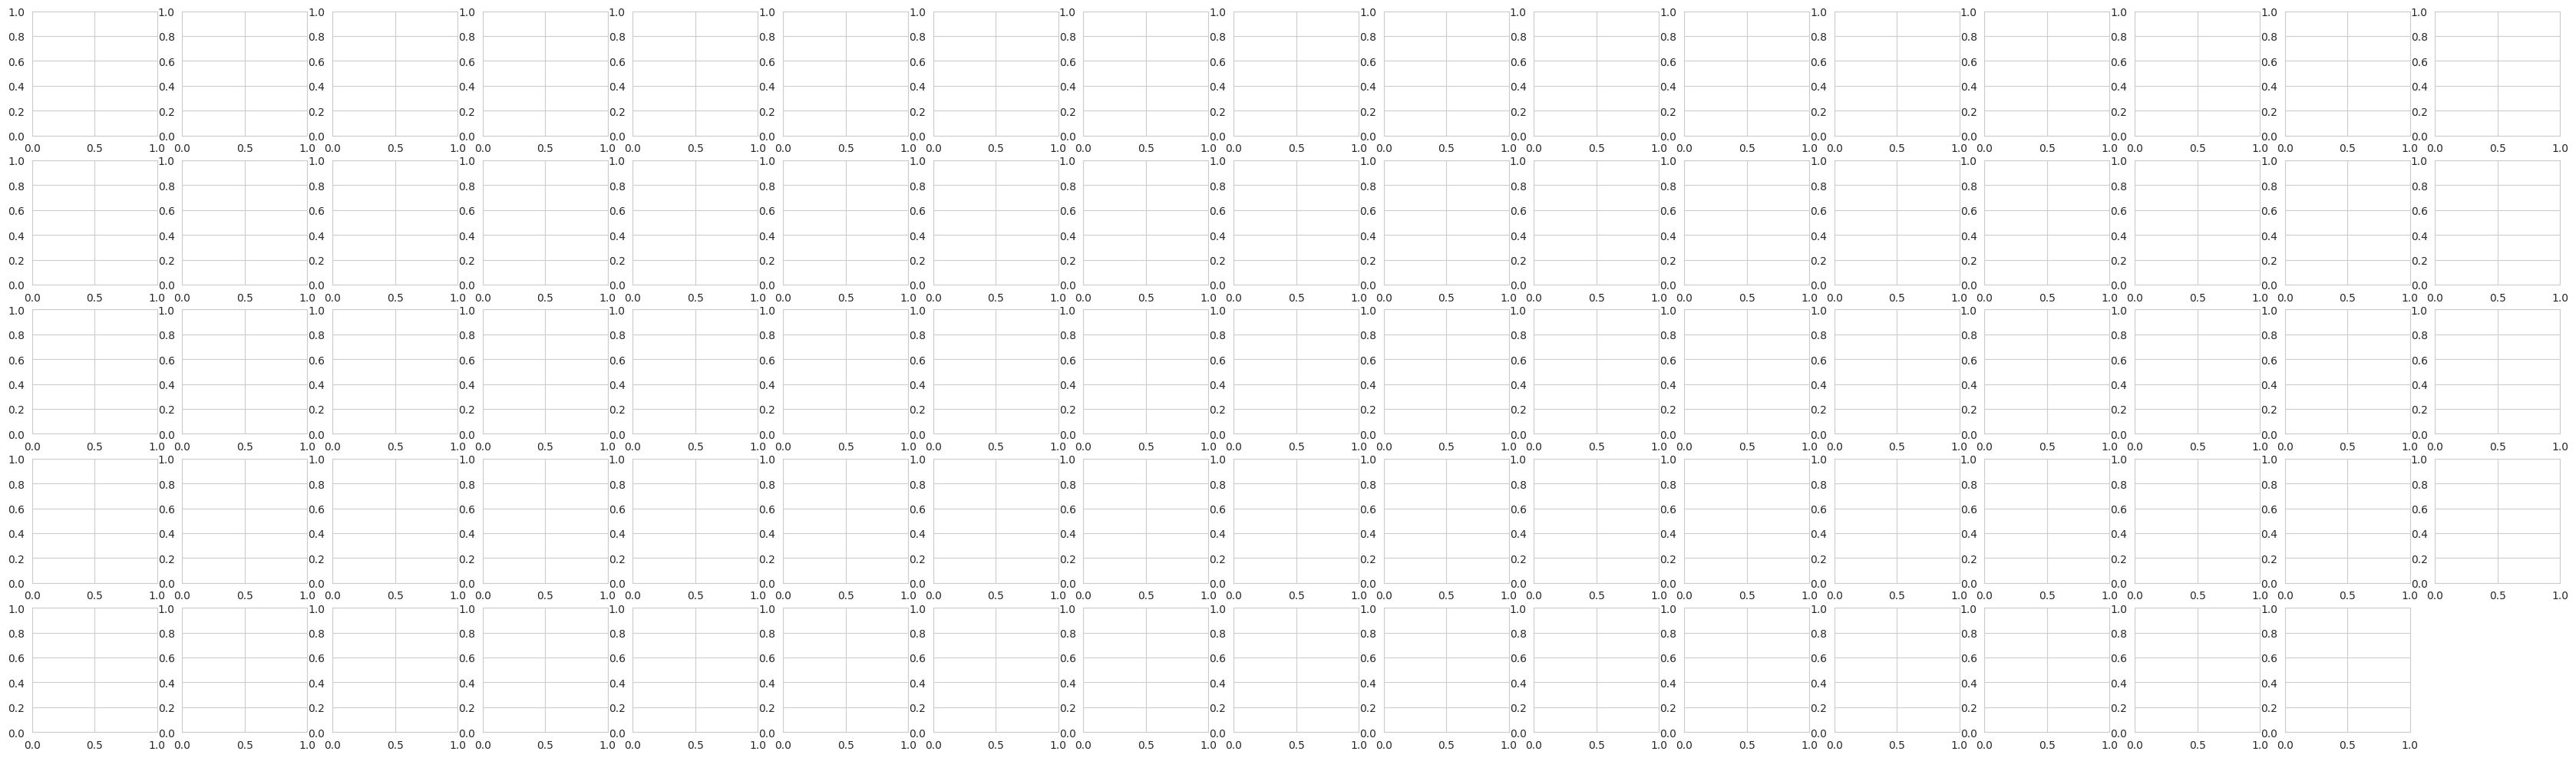

In [47]:
# make the pairplot to understand the relation between features

plt.figure(figsize=(15,10))
sns.pairplot(data_cleaned, diag_kind="kde", palette="coolwarm", height=2.5)
plt.show()

In [48]:
# prepare the dataset for the model
data_cleaned.head(40)

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
0,2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,1.799111,1.799111,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
1,2004-10-04,1.797591,1.797785,1.782086,1.784312,1.794178,1.796421,1.797702,NaN,NaN,NaN,0.000000,0.000000,-0.001181,-0.000944,-0.000236,NaN,NaN
2,2004-10-05,1.784312,1.787694,1.780912,1.782912,1.790423,1.793965,1.796293,NaN,NaN,NaN,0.000000,0.000000,-0.002204,-0.001574,-0.000630,NaN,NaN
3,2004-10-06,1.782785,1.788493,1.775095,1.779486,1.786777,1.791332,1.794693,NaN,NaN,NaN,0.000000,0.000000,-0.003253,-0.002099,-0.001154,NaN,NaN
4,2004-10-07,1.779486,1.784312,1.777493,1.782499,1.785351,1.789726,1.793531,1.785664,NaN,NaN,13.310409,13.310409,-0.003799,-0.002115,-0.001683,NaN,NaN
5,2004-10-08,1.782690,1.796687,1.782086,1.795203,1.788635,1.790722,1.793691,1.784883,NaN,NaN,44.471316,44.471316,-0.003169,-0.001189,-0.001980,NaN,NaN
6,2004-10-11,1.794495,1.799500,1.792597,1.798691,1.791987,1.792171,1.794167,1.787758,NaN,NaN,49.458285,49.458285,-0.002361,-0.000305,-0.002057,NaN,NaN
7,2004-10-12,1.798788,1.799403,1.785395,1.791088,1.791687,1.791974,1.793874,1.789393,NaN,NaN,41.359887,41.359887,-0.002308,-0.000201,-0.002107,NaN,NaN
8,2004-10-13,1.790895,1.795687,1.784790,1.793304,1.792226,1.792216,1.793819,1.792157,NaN,NaN,44.031277,44.031277,-0.002063,0.000035,-0.002098,NaN,NaN
9,2004-10-14,1.793304,1.803784,1.792789,1.797107,1.793853,1.793105,1.794132,1.795078,1.790371,NaN,48.089065,48.089065,-0.001545,0.000443,-0.001987,NaN,NaN


In [49]:
#cut the first 30 values of the dataset which has Nan values
data_cleaned = data_cleaned[38:]
#data_cleaned = data_cleaned[:,1:]


In [50]:
data_cleaned.head(40)

,Date,Open,High,Low,Close,EMA5,EMA10,EMA20,SMA5,SMA10,SMA20,RSI12,RSI24,MACD,MACD_Histogram,Signal_line,BB_Upper_band,BB_Lower_band
38,2004-11-25,1.881503,1.894190,1.880406,1.891790,1.875526,1.866176,1.854293,1.872356,1.862636,1.854303,67.062009,67.383189,0.014887,0.002211,0.012675,1.884704,1.823902
39,2004-11-26,1.891790,1.903384,1.884908,1.893509,1.881520,1.871146,1.858028,1.879041,1.866258,1.857073,73.622658,67.368046,0.016181,0.002804,0.013376,1.886975,1.827172
40,2004-11-29,1.892004,1.896598,1.885690,1.892506,1.885182,1.875029,1.861312,1.885580,1.870867,1.860063,75.753025,64.625543,0.016930,0.002843,0.014087,1.889356,1.830770
41,2004-11-30,1.892398,1.913107,1.887398,1.909600,1.893321,1.881315,1.865911,1.893704,1.876508,1.863553,76.469992,69.961297,0.018688,0.003681,0.015007,1.892414,1.834693
42,2004-12-01,1.909600,1.935696,1.909600,1.933114,1.906585,1.890733,1.872311,1.904104,1.883880,1.867829,88.892264,76.219641,0.021728,0.005377,0.016352,1.896673,1.838984
43,2004-12-02,1.933189,1.943408,1.918797,1.924002,1.912391,1.896782,1.877234,1.910546,1.891451,1.871834,81.113006,71.541932,0.023135,0.005427,0.017708,1.901020,1.842648
44,2004-12-03,1.924002,1.944693,1.919791,1.944088,1.922957,1.905383,1.883601,1.920662,1.899851,1.876174,83.166724,76.013224,0.025577,0.006295,0.019282,1.906207,1.846141
45,2004-12-06,1.943786,1.944391,1.936483,1.936708,1.927541,1.911078,1.888659,1.929502,1.907541,1.880280,85.663029,72.604285,0.026609,0.005862,0.020747,1.911440,1.849119
46,2004-12-07,1.937083,1.950801,1.937083,1.945109,1.933397,1.917266,1.894035,1.936604,1.915154,1.884750,85.259713,72.678486,0.027785,0.005630,0.022155,1.917331,1.852168
47,2004-12-08,1.945109,1.945185,1.920787,1.937083,1.934626,1.920869,1.898135,1.937398,1.920751,1.889259,80.111129,71.249327,0.027749,0.004476,0.023274,1.923504,1.855015


In [51]:
train_col = [col for col in  data_cleaned.columns  if col != 'Close' and col != 'Date']
print(train_col)

['Open', 'High', 'Low', 'EMA5', 'EMA10', 'EMA20', 'SMA5', 'SMA10', 'SMA20', 'RSI12', 'RSI24', 'MACD', 'MACD_Histogram', 'Signal_line', 'BB_Upper_band', 'BB_Lower_band']


In [73]:
#get the data of the feature
data_feature = data_cleaned[train_col].values

#get the data of the target value
y_target = data_cleaned['Close'].values

print(data_feature.shape)
print(y_target.shape)

(5161, 16)
(5161,)


In [74]:
#split the data into train and test split size
train_size_data = int(len(data_feature)*0.7)
test_size_data =  len(data_feature) - train_size_data

#make the target axis train test split size

train_size_y = int(len(y_target)*0.7)
test_size_y =  len(y_target) - train_size_y

#make the train test data for feature
trainX, testX = data_feature[:train_size_data,:], data_feature[train_size_data:len(data_feature),:]

#make the target data
trainY, testY = y_target[:train_size_y,], y_target[train_size_y:len(y_target),]



In [75]:
#print the shape of the train data and test data

print("size of train data feature :",trainX.shape,"size of train data target", trainY.shape)
print("size of test data feature :",testX.shape,"size of test data target", testY.shape)

size of train data feature : (3612, 16) size of train data target (3612,)
size of test data feature : (1549, 16) size of test data target (1549,)


In [82]:
# scaled the dataset using min max scaler

scaler = MinMaxScaler(feature_range=(0,1))

#scale the dataset
data_feature_train_scaled = scaler.fit_transform(trainX)

data_y_train_scaled = scaler.fit_transform(trainY.reshape(-1,1))

data_feature_test_scaled = scaler.fit_transform(testX)

data_y_test_scaled = scaler.fit_transform(testY.reshape(-1,1))


In [83]:
print(data_y_test_scaled.shape)

(1549, 1)


In [87]:
#Make the series time frame for the mode

def dataset_series(dataX, dataY, look_back):
  '''
  generate sequence for the features and target values

  parameters:
   dataX: input features data
   dataY: target feature data
   look_back: the window size for the data

   return:
   np.array : array of input feature with look back window
   np.array : array of test feature with look back window
  '''
  x, y = [], []
  for i in range(len(dataX) - look_back):
    xData = dataX[i: i+look_back]
    x.append(xData)
    y.append(dataY[i+look_back])
  return np.array(x), np.array(y)


In [88]:
#make the time series dataset
data_feature_train_series, y_target_train_series = dataset_series(data_feature_train_scaled, data_y_train_scaled, 5)
data_feature_test_series, y_target_test_series = dataset_series(data_feature_test_scaled, data_y_train_scaled, 5)


In [89]:
#print the shape of the datasets
print("train data set series of feature",data_feature_train_series.shape,"train dataset series of target ", y_target_train_series.shape)
print("test data set series of feature",data_feature_test_series.shape,"test dataset series of target ", y_target_test_series.shape)

train data set series of feature (3607, 5, 16) train dataset series of target  (3607, 1)
test data set series of feature (1544, 5, 16) test dataset series of target  (1544, 1)


# **Model**